In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np

from src.bandits.environment import Oracle
from src.bandits.policies import UCB, BernouillyThomsonSampling, EpsilonGreedy, Policy

In [3]:
num_actions = 10
num_steps = 1000

true_probas = np.random.random(num_actions)
rewards = np.random.binomial(1, true_probas, size=(num_steps, num_actions))

true_probas

array([0.02313921, 0.94335093, 0.78753132, 0.17853955, 0.92695846,
       0.76295628, 0.82440875, 0.53376671, 0.3661327 , 0.64439592])

In [35]:
policies: list[Policy] = [
    EpsilonGreedy(num_actions, epsilon=0.1),
    UCB(num_actions),
    BernouillyThomsonSampling(num_actions, alpha_priors=np.ones(num_actions), beta_priors=np.ones(num_actions)),
]

num_iter = 10
env = Oracle(rewards)
policy_rewards, policy_actions = env.evaluate_policies(policies, num_iter)

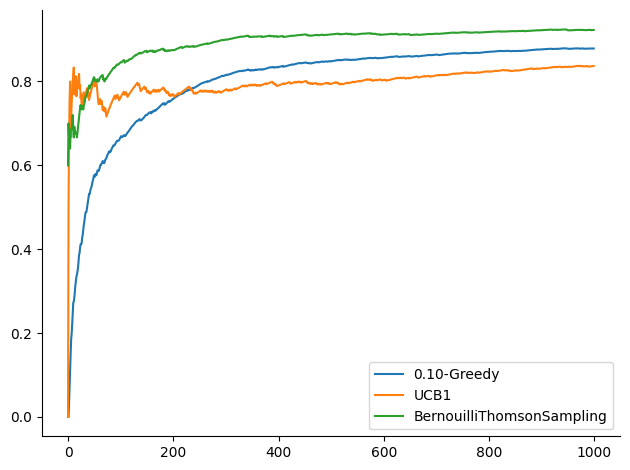

In [41]:
ax = plt.subplot()

step_inds = np.arange(1, num_steps + 1)[:, None]
mean_reward = policy_rewards.mean(axis=2).cumsum(axis=0) / step_inds
# se_reward = (policy_actions.std(axis=2).cumsum(axis=0) / step_inds) / np.sqrt(num_iter)

for p_idx, policy in enumerate(policies):
    ax.plot(mean_reward[:, p_idx], label=policy.name)
    # ax.fill_between(
    #     np.arange(num_steps),
    #     mean_reward[:, p_idx] - se_reward[:, p_idx],
    #     mean_reward[:, p_idx] + se_reward[:, p_idx],
    #     color="gray",
    #     alpha=0.3,
    # )

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tight_layout()
plt.legend()